### Done by : Sanjay Marreddi  
### Email Id  : sanjay.mareddi@gmail.com

    

#### First let us import the required Libraries

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Let us read the given Dataset

In [2]:
information = pd.read_excel('information.xlsx')

## Exploratory data analysis and Data Cleaning

In [3]:
information.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,2013-05-12 01:48:00,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,658730000000000000,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,2012-01-10 13:51:00,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,658730000000000000,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,658730000000000000,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,2009-11-06 22:39:00,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,658730000000000000,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,658730000000000000,NaN,NaN


In [4]:
information.shape

(20050, 26)

In [5]:
information.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'gender',
 'gender:confidence',
 'profile_yn',
 'profile_yn:confidence',
 'created',
 'description',
 'fav_number',
 'gender_gold',
 'link_color',
 'name',
 'profile_yn_gold',
 'profileimage',
 'retweet_count',
 'sidebar_color',
 'text',
 'tweet_coord',
 'tweet_count',
 'tweet_created',
 'tweet_id',
 'tweet_location',
 'user_timezone']

In [6]:
information.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [7]:
information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16301 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [8]:
information.isnull().sum() # Checking the Missing Values in each Column of the DataFrame

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3749
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         2
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7486
user_timezone             7798
dtype: int64

In [9]:
information.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


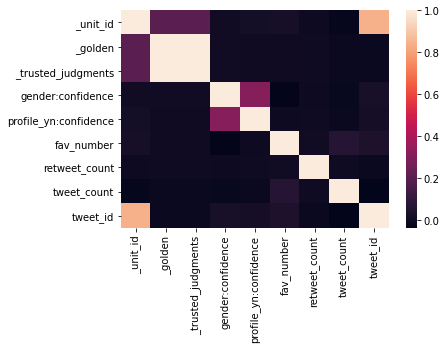

In [10]:
# HaetMap of the Correlation Matrix
sns.heatmap(information.corr())

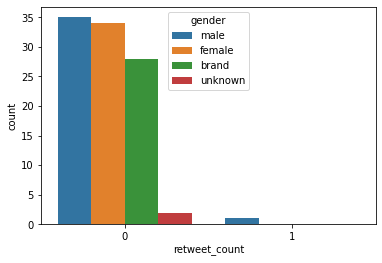

In [11]:
sns.countplot(x="retweet_count", data=information.loc[1:100,:], hue = 'gender')

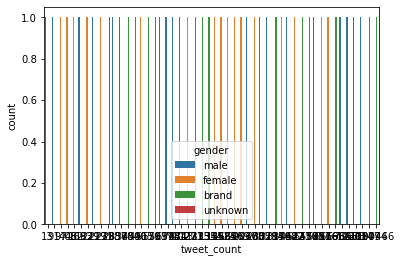

In [12]:
sns.countplot(x="tweet_count", data=information.loc[1:50,:], hue = 'gender')

In [13]:
information.description

0                                    i sing my own rhythm.
1        I'm the author of novels filled with family dr...
2                      louis whining and squealing and all
3        Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4        Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
                               ...                        
20045                                                 (rp)
20046    Whatever you like, it's not a problem at all. ...
20047    #TeamBarcelona ..You look lost so you should f...
20048    Anti-statist; I homeschool my kids. Aspiring t...
20049                       Teamwork makes the dream work.
Name: description, Length: 20050, dtype: object

In [14]:
information.name

0               sheezy0
1           DavdBurnett
2        lwtprettylaugh
3           douggarland
4          WilfordGemma
              ...      
20045       capuletrosa
20046        BenNight41
20047     realuzzyfluxz
20048      argumatronic
20049       MeganFitz20
Name: name, Length: 20050, dtype: object

In [15]:
information.text

0        Robbie E Responds To Critics After Win Against...
1        ‰ÛÏIt felt like they were my friends and I was...
2        i absolutely adore when louis starts the songs...
3        Hi @JordanSpieth - Looking at the url - do you...
4        Watching Neighbours on Sky+ catching up with t...
                               ...                        
20045    @lookupondeath ...Fine, and I'll drink tea too...
20046    Greg Hardy you a good player and all but don't...
20047    You can miss people and still never want to se...
20048    @bitemyapp i had noticed your tendency to pee ...
20049    I think for my APUSH creative project I'm goin...
Name: text, Length: 20050, dtype: object

In [16]:
information =  information[["gender", "name","description", "gender:confidence","text"]]

###### Dropping the rows with NaN 

In [17]:
information = information.dropna()

In [18]:
information.shape

(16217, 5)

#### Data Cleaning of "description" column

In [19]:
list_of_stopwords = list(stopwords.words('english'))

In [20]:
information.columns

Index(['gender', 'name', 'description', 'gender:confidence', 'text'], dtype='object')

In [21]:
# Taking only those rows which has type of description str. 
temp=[]
for i in range(information.shape[0]):
    temp.append(type(information['description'].values[i]) == str)

In [22]:
information = information.loc[temp,:]

In [23]:
stemmer = PorterStemmer()
words = stopwords.words("english")
# Data Cleaning using regex.
information['cleaned_description'] = information['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [24]:
information.head()

,gender,name,description,gender:confidence,text,cleaned_description
0,male,sheezy0,i sing my own rhythm.,1.0000,Robbie E Responds To Critics After Win Against...,sing rhythm
1,male,DavdBurnett,I'm the author of novels filled with family dr...,1.0000,‰ÛÏIt felt like they were my friends and I was...,i author novel fill famili drama romanc
2,male,lwtprettylaugh,louis whining and squealing and all,0.6625,i absolutely adore when louis starts the songs...,loui whine squeal
3,male,douggarland,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",1.0000,Hi @JordanSpieth - Looking at the url - do you...,mobil guy er shazam googl kleiner perkin yahoo...
4,female,WilfordGemma,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1.0000,Watching Neighbours on Sky+ catching up with t...,ricki wilson the best frontman kaiser chief th...


#### Data Cleaning of "text" column

In [25]:
information.columns

Index(['gender', 'name', 'description', 'gender:confidence', 'text',
       'cleaned_description'],
      dtype='object')

In [26]:
stemmer = PorterStemmer()
words = stopwords.words("english")
information['cleaned_text'] = information['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [27]:
information.head()

,gender,name,description,gender:confidence,text,cleaned_description,cleaned_text
0,male,sheezy0,i sing my own rhythm.,1.0000,Robbie E Responds To Critics After Win Against...,sing rhythm,robbi e respond to critic after win against ed...
1,male,DavdBurnett,I'm the author of novels filled with family dr...,1.0000,‰ÛÏIt felt like they were my friends and I was...,i author novel fill famili drama romanc,it felt like friend i live stori http co arng ...
2,male,lwtprettylaugh,louis whining and squealing and all,0.6625,i absolutely adore when louis starts the songs...,loui whine squeal,absolut ador loui start song hit hard feel good
3,male,douggarland,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",1.0000,Hi @JordanSpieth - Looking at the url - do you...,mobil guy er shazam googl kleiner perkin yahoo...,hi jordanspieth look url use ifttt don typic s...
4,female,WilfordGemma,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1.0000,Watching Neighbours on Sky+ catching up with t...,ricki wilson the best frontman kaiser chief th...,watch neighbour ski catch neighb xxx xxx


### Feature Selection and Feature Engineering

In [28]:
# Taking only those rows with full confidence in gender
information = information[information["gender:confidence"]==1]

In [29]:
information.head()

,gender,name,description,gender:confidence,text,cleaned_description,cleaned_text
0,male,sheezy0,i sing my own rhythm.,1.0,Robbie E Responds To Critics After Win Against...,sing rhythm,robbi e respond to critic after win against ed...
1,male,DavdBurnett,I'm the author of novels filled with family dr...,1.0,‰ÛÏIt felt like they were my friends and I was...,i author novel fill famili drama romanc,it felt like friend i live stori http co arng ...
3,male,douggarland,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",1.0,Hi @JordanSpieth - Looking at the url - do you...,mobil guy er shazam googl kleiner perkin yahoo...,hi jordanspieth look url use ifttt don typic s...
4,female,WilfordGemma,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1.0,Watching Neighbours on Sky+ catching up with t...,ricki wilson the best frontman kaiser chief th...,watch neighbour ski catch neighb xxx xxx
5,female,monroevicious,you don't know me.,1.0,"Ive seen people on the train with lamps, chair...",know,ive seen peopl train lamp chair tv etc http co...


In [30]:
X_information =  information[["name","cleaned_text","cleaned_description"]]  #Independent Variables

y_information = information[["gender"]]   # Dependent Variable

In [31]:
print (X_information.shape)
X_information.head()

(11825, 3)


,name,cleaned_text,cleaned_description
0,sheezy0,robbi e respond to critic after win against ed...,sing rhythm
1,DavdBurnett,it felt like friend i live stori http co arng ...,i author novel fill famili drama romanc
3,douggarland,hi jordanspieth look url use ifttt don typic s...,mobil guy er shazam googl kleiner perkin yahoo...
4,WilfordGemma,watch neighbour ski catch neighb xxx xxx,ricki wilson the best frontman kaiser chief th...
5,monroevicious,ive seen peopl train lamp chair tv etc http co...,know


In [32]:
print(X_information.shape)
y_information.head()

(11825, 3)


,gender
0,male
1,male
3,male
4,female
5,female


##### Label Encoding the gender column for ease of Calculation 

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_information['gender_encoded'] = le.fit_transform(y_information["gender"]) 

<ipython-input-33-aacfd1ffe886>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_information['gender_encoded'] = le.fit_transform(y_information["gender"])


In [34]:
y_information = y_information[["gender_encoded"]]

In [35]:
print(X_information.shape)
y_information.head()

(11825, 3)


,gender_encoded
0,2
1,2
3,2
4,1
5,1


# Ensemble Machine Learning Modelling

## 1. Classification using Naive Bayes Algorithm 

In [36]:
print (X_information.shape)
X_information.head()

(11825, 3)


,name,cleaned_text,cleaned_description
0,sheezy0,robbi e respond to critic after win against ed...,sing rhythm
1,DavdBurnett,it felt like friend i live stori http co arng ...,i author novel fill famili drama romanc
3,douggarland,hi jordanspieth look url use ifttt don typic s...,mobil guy er shazam googl kleiner perkin yahoo...
4,WilfordGemma,watch neighbour ski catch neighb xxx xxx,ricki wilson the best frontman kaiser chief th...
5,monroevicious,ive seen peopl train lamp chair tv etc http co...,know


In [37]:
print(y_information.shape)
y_information.head()

(11825, 1)


,gender_encoded
0,2
1,2
3,2
4,1
5,1


In [38]:
# Splitting the data into Training and Testing Sets

Train_X_Nb, Test_X_Nb, Train_Y_Nb, Test_Y_Nb = train_test_split(X_information['cleaned_description'],y_information['gender_encoded'], random_state=1,test_size = 0.01)

In [39]:
# Doing Label Encoding for both Training and Testing Sets.

Encoder = LabelEncoder()
Train_Y_Nb = Encoder.fit_transform(Train_Y_Nb)
Test_Y_Nb = Encoder.fit_transform(Test_Y_Nb)

In [40]:
# Transforming text to feature vectors that can be used as input to estimator.

T_vect = TfidfVectorizer(max_features=5000)
T_vect.fit(X_information['cleaned_description'])

TfidfVectorizer(max_features=5000)

In [41]:
# Transforming the Train and Test sets.

Train_X_Nb_T = T_vect.transform(Train_X_Nb)
Test_X_Nb_T = T_vect.transform(Test_X_Nb)

In [42]:
# fit the training dataset on the NB classifier.

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Nb_T,Train_Y_Nb)

MultinomialNB()

In [43]:
# predict the labels on validation dataset.

predictions_Nb = Naive.predict(Test_X_Nb_T)

# Use accuracy_score function to get the accuracy.

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_Nb, Test_Y_Nb)*100)

Naive Bayes Accuracy Score ->  71.42857142857143


## 2. Classification using Support Vector Machine Algorithm 

In [44]:
print (X_information.shape)
X_information.head()

(11825, 3)


,name,cleaned_text,cleaned_description
0,sheezy0,robbi e respond to critic after win against ed...,sing rhythm
1,DavdBurnett,it felt like friend i live stori http co arng ...,i author novel fill famili drama romanc
3,douggarland,hi jordanspieth look url use ifttt don typic s...,mobil guy er shazam googl kleiner perkin yahoo...
4,WilfordGemma,watch neighbour ski catch neighb xxx xxx,ricki wilson the best frontman kaiser chief th...
5,monroevicious,ive seen peopl train lamp chair tv etc http co...,know


In [45]:
print (y_information.shape)
y_information.head()

(11825, 1)


,gender_encoded
0,2
1,2
3,2
4,1
5,1


In [46]:
# Splitting the data into Training and Testing Sets

Train_X_Svm, Test_X_Svm, Train_Y_Svm, Test_Y_Svm = train_test_split(X_information['cleaned_description'],y_information['gender_encoded'],test_size = 0.01, random_state=10)

In [47]:
# Doing Label Encoding for both Training and Testing Sets.

Encoder = LabelEncoder()
Train_Y_Svm = Encoder.fit_transform(Train_Y_Svm)
Test_Y_Svm = Encoder.fit_transform(Test_Y_Svm)

In [48]:
# Transforming text to feature vectors that can be used as input to estimator.

T_vect = TfidfVectorizer(max_features=5000)
T_vect.fit(X_information['cleaned_description'])

TfidfVectorizer(max_features=5000)

In [49]:
# Transforming the Train and Test sets.

Train_X_Svm_T = T_vect.transform(Train_X_Svm)
Test_X_Svm_T = T_vect.transform(Test_X_Svm)

In [50]:
# fit the training dataset on the classifier

SVM = svm.SVC(C=2, kernel='linear', degree=2, gamma='auto')
SVM.fit(Train_X_Svm_T,Train_Y_Svm)

SVC(C=2, degree=2, gamma='auto', kernel='linear')

In [51]:
# predict the labels on validation dataset

predictions_Svm = SVM.predict(Test_X_Svm_T)

# Use accuracy_score function to get the accuracy

print("SVM Accuracy Score -> ",accuracy_score(predictions_Svm, Test_Y_Svm)*100)

SVM Accuracy Score ->  68.0672268907563


## 3. Classification using Logistic Regression Algorithm 

In [52]:
print (X_information.shape)
X_information.head()

(11825, 3)


,name,cleaned_text,cleaned_description
0,sheezy0,robbi e respond to critic after win against ed...,sing rhythm
1,DavdBurnett,it felt like friend i live stori http co arng ...,i author novel fill famili drama romanc
3,douggarland,hi jordanspieth look url use ifttt don typic s...,mobil guy er shazam googl kleiner perkin yahoo...
4,WilfordGemma,watch neighbour ski catch neighb xxx xxx,ricki wilson the best frontman kaiser chief th...
5,monroevicious,ive seen peopl train lamp chair tv etc http co...,know


In [53]:
print(y_information.shape)
y_information.head()

(11825, 1)


,gender_encoded
0,2
1,2
3,2
4,1
5,1


In [54]:
# Splitting the data into Training and Testing Sets

Train_X_Lr, Test_X_Lr, Train_Y_Lr, Test_Y_Lr = train_test_split(X_information['cleaned_description'],y_information['gender_encoded'],test_size = 0.01, random_state=22)

In [55]:
# Doing Label Encoding for both Training and Testing Sets.

Encoder = LabelEncoder()
Train_Y_Lr = Encoder.fit_transform(Train_Y_Lr)
Test_Y_Lr = Encoder.fit_transform(Test_Y_Lr)

In [56]:
# Transforming text to feature vectors that can be used as input to estimator.

T_vect = TfidfVectorizer(max_features=5000)
T_vect.fit(X_information['cleaned_description'])

TfidfVectorizer(max_features=5000)

In [57]:
# Transforming the Train and Test sets.

Train_X_Lr_T = T_vect.transform(Train_X_Lr)
Test_X_Lr_T = T_vect.transform(Test_X_Lr)

In [58]:
# fit the training dataset on the classifier

lr = LogisticRegression(max_iter = 1000)
lr.fit(Train_X_Lr_T,Train_Y_Lr)

LogisticRegression(max_iter=1000)

In [59]:
# predict the labels on validation dataset

predictions_Lr = lr.predict(Test_X_Lr_T)

# Use accuracy_score function to get the accuracy

print("LR Accuracy Score -> ",accuracy_score(predictions_Lr, Test_Y_Lr)*100)

LR Accuracy Score ->  70.58823529411765


### Ensemble Machine Learning Modelling -> Choosing best Algo based on Accuracy

###### From above Models, Accuracy obtained through

1. Naive Bayes Algorithm           is **71.42857142857143 %**

2. Support Vector Machine Algorithm is **68.0672268907563 %**

3. Logistic Regression Algorithm is  **70.58823529411765 %**




###### So, For the given data set and the used hyperparameters, Based on the accuracy score , We can say **Naive Bias Algorithm is best** in this case.

# Questions on DataSet 

## 1.What are the most common emotions/words used by Males and Females?

#### 1.a For Males

In [60]:
# Reading the data and dropping null values

information = pd.read_excel('information.xlsx')
information =  information[["gender", "name","description", "gender:confidence","text"]]
information = information.dropna()

In [61]:
# Taking only those rows which has type of description str. 
temp=[]
for i in range(information.shape[0]):
    temp.append(type(information['description'].values[i]) == str)    
information = information.loc[temp,:]


# Data Cleaning
stemmer = PorterStemmer()
words = stopwords.words("english")
information['cleaned_description'] = information['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

stemmer = PorterStemmer()
words = stopwords.words("english")
information['cleaned_text'] = information['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


# Feature Selection & Engineering
information = information[information["gender:confidence"]==1]
X_information =  information[["gender", "name","cleaned_text","cleaned_description"]]

In [62]:
X_information.gender.value_counts()

female     4606
male       4141
brand      3006
unknown      72
Name: gender, dtype: int64

In [63]:
# Taking only those rows with gender as "Male"

X_info_M = X_information.loc[ (X_information.gender == "male" )] 

In [64]:
X_info_M.head()

,gender,name,cleaned_text,cleaned_description
0,male,sheezy0,robbi e respond to critic after win against ed...,sing rhythm
1,male,DavdBurnett,it felt like friend i live stori http co arng ...,i author novel fill famili drama romanc
3,male,douggarland,hi jordanspieth look url use ifttt don typic s...,mobil guy er shazam googl kleiner perkin yahoo...
7,male,RobinMeske,gala bingo club bought the uk largest high str...,the secret get ahead get start
17,male,SSmyth2010,coolyazzi ditto i still learn favourit retweet...,over enthusiast f fan model collector music fa...


In [65]:
# Instantiating the Counter.
words_M = Counter()

# Taking the column named "cleaned_text" and counting the frequency of each word.
X_info_M['cleaned_text'].str.split().apply(words_M.update)

print(words_M)

Counter({'i': 1460, 'co': 1351, 'http': 1338, 'the': 524, 'get': 301, 'like': 278, 'go': 212, 'and': 207, 'one': 197, 'time': 185, 'make': 159, 'new': 158, 'love': 158, 'it': 146, 'day': 138, 'look': 136, 'you': 136, 'see': 135, 'peopl': 134, 'know': 132, 'good': 123, 'think': 123, 'want': 116, 'back': 114, 'got': 113, 'need': 113, 'best': 108, 'amp': 105, 'fuck': 104, 'game': 103, 'u': 103, 'say': 102, 'come': 102, 'year': 100, 'still': 99, 'thank': 97, 'a': 95, 'thing': 94, 'if': 94, 'work': 94, 'follow': 92, 'would': 92, 'great': 88, 'way': 85, 'play': 85, 'let': 82, 'last': 82, 'realli': 81, 'use': 80, 'lol': 80, 'via': 79, 'tri': 74, 'today': 73, 'take': 72, 'life': 72, 'shit': 71, 'well': 70, 'start': 69, 'even': 68, 'man': 68, 'first': 68, 'live': 67, 'world': 67, 'feel': 67, 'week': 66, 'watch': 65, 'next': 65, 'my': 64, 'hope': 63, 'that': 62, 'we': 62, 'alway': 62, 'right': 61, 'never': 61, 'much': 61, 'could': 61, 'in': 59, 'guy': 59, 'video': 58, 'just': 58, 'chang': 57, 's

In [66]:
# Sorting the Dictionary with the Values in Descending Order
{k: v for k, v in sorted(words_M.items(), key=lambda item: item[1], reverse =True )}

{'i': 1460,
 'co': 1351,
 'http': 1338,
 'the': 524,
 'get': 301,
 'like': 278,
 'go': 212,
 'and': 207,
 'one': 197,
 'time': 185,
 'make': 159,
 'new': 158,
 'love': 158,
 'it': 146,
 'day': 138,
 'look': 136,
 'you': 136,
 'see': 135,
 'peopl': 134,
 'know': 132,
 'good': 123,
 'think': 123,
 'want': 116,
 'back': 114,
 'got': 113,
 'need': 113,
 'best': 108,
 'amp': 105,
 'fuck': 104,
 'game': 103,
 'u': 103,
 'say': 102,
 'come': 102,
 'year': 100,
 'still': 99,
 'thank': 97,
 'a': 95,
 'thing': 94,
 'if': 94,
 'work': 94,
 'follow': 92,
 'would': 92,
 'great': 88,
 'way': 85,
 'play': 85,
 'let': 82,
 'last': 82,
 'realli': 81,
 'use': 80,
 'lol': 80,
 'via': 79,
 'tri': 74,
 'today': 73,
 'take': 72,
 'life': 72,
 'shit': 71,
 'well': 70,
 'start': 69,
 'even': 68,
 'man': 68,
 'first': 68,
 'live': 67,
 'world': 67,
 'feel': 67,
 'week': 66,
 'watch': 65,
 'next': 65,
 'my': 64,
 'hope': 63,
 'that': 62,
 'we': 62,
 'alway': 62,
 'right': 61,
 'never': 61,
 'much': 61,
 'could'

#### So,From the above calculation, 
###### The Most Common WORD  used by Males is "I" which was used 1460 times !
###### The most Common EMOTION used by Males is "love" which was used 158 times !!

#### 1.b For Females

In [67]:
# Taking only those rows with gender as "Female"

X_info_F = X_information.loc[ (X_information.gender == "female" )] 

In [68]:
X_info_F.head()

,gender,name,cleaned_text,cleaned_description
4,female,WilfordGemma,watch neighbour ski catch neighb xxx xxx,ricki wilson the best frontman kaiser chief th...
5,female,monroevicious,ive seen peopl train lamp chair tv etc http co...,know
8,female,pigzilla_,aphmau pic defin mcd fangirl fanboy mcd shippe...,pll fan crazi mcd ramen bae
9,female,GabrieleNeher,evieladi love tree year never seen gorgeou aut...,renaiss art historian univers nottingham fuell...
16,female,Toucaan_Samm,giannaaa lmao dude i hella scare next episod b...,jmkm


In [69]:
# Instantiating the Counter.
words_F = Counter()

# Taking the column named "cleaned_text" and counting the frequency of each word.
X_info_F['cleaned_text'].str.split().apply(words_F.update)

print(words_F)

Counter({'i': 2311, 'co': 1380, 'http': 1373, 'the': 438, 'get': 336, 'like': 329, 'and': 305, 'go': 282, 'love': 275, 'day': 263, 'one': 260, 'time': 207, 'peopl': 181, 'make': 176, 'want': 168, 'know': 159, 'u': 149, 'look': 145, 'you': 144, 'amp': 144, 'thank': 143, 'got': 140, 'it': 140, 'new': 139, 'best': 137, 'need': 132, 'thing': 129, 'good': 128, 'my': 126, 'see': 125, 'work': 125, 'still': 125, 'follow': 123, 'say': 121, 'think': 119, 'so': 118, 'back': 118, 'come': 115, 'even': 111, 'take': 107, 'today': 107, 'tri': 106, 'just': 105, 'fuck': 105, 'feel': 104, 'life': 104, 'watch': 103, 'girl': 102, 'lol': 101, 'year': 99, 'right': 99, 'thi': 93, 'friend': 93, 'happi': 91, 'never': 89, 'when': 89, 'realli': 88, 'a': 87, 'much': 86, 'ever': 86, 'im': 86, 'would': 85, 'vote': 85, 'way': 84, 'shit': 83, 'let': 82, 'last': 79, 'person': 79, 'home': 78, 'live': 77, 'world': 76, 'alway': 76, 'talk': 74, 'first': 72, 'week': 71, 'use': 71, 'help': 70, 'show': 68, 'made': 65, 'if': 6

In [70]:
# Sorting the Dictionary with the Values in Descending Order
{k: v for k, v in sorted(words_F.items(), key=lambda item: item[1], reverse =True )}

{'i': 2311,
 'co': 1380,
 'http': 1373,
 'the': 438,
 'get': 336,
 'like': 329,
 'and': 305,
 'go': 282,
 'love': 275,
 'day': 263,
 'one': 260,
 'time': 207,
 'peopl': 181,
 'make': 176,
 'want': 168,
 'know': 159,
 'u': 149,
 'look': 145,
 'you': 144,
 'amp': 144,
 'thank': 143,
 'got': 140,
 'it': 140,
 'new': 139,
 'best': 137,
 'need': 132,
 'thing': 129,
 'good': 128,
 'my': 126,
 'see': 125,
 'work': 125,
 'still': 125,
 'follow': 123,
 'say': 121,
 'think': 119,
 'so': 118,
 'back': 118,
 'come': 115,
 'even': 111,
 'take': 107,
 'today': 107,
 'tri': 106,
 'just': 105,
 'fuck': 105,
 'feel': 104,
 'life': 104,
 'watch': 103,
 'girl': 102,
 'lol': 101,
 'year': 99,
 'right': 99,
 'thi': 93,
 'friend': 93,
 'happi': 91,
 'never': 89,
 'when': 89,
 'realli': 88,
 'a': 87,
 'much': 86,
 'ever': 86,
 'im': 86,
 'would': 85,
 'vote': 85,
 'way': 84,
 'shit': 83,
 'let': 82,
 'last': 79,
 'person': 79,
 'home': 78,
 'live': 77,
 'world': 76,
 'alway': 76,
 'talk': 74,
 'first': 72,
 

#### So,From the above calculation, 
###### The Most Common WORD  used by Females is "I" which was used 2311 times !
###### The most Common EMOTION used by Females is "love" which was used 275 times !!

## 2. Which Gender has more number of tweet count ? On an average what is the tweet_count by each gender ?

In [71]:
# Reading the data
information = pd.read_excel('information.xlsx')

In [72]:
# Selecting the required features
information = information[["gender", "tweet_count"]]

In [73]:
information.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [74]:
information.shape

(20050, 2)

In [75]:
# Going through each row and summing up the number of tweets for each gender and storing in a Dictionary

tweet_counter= {}
for i in range(information.shape[0]):
    for gen in ["male", "female","brand","unknown"]: 
        if information.gender[i] == gen :
            if not gen in tweet_counter:
                tweet_counter[gen] = information.tweet_count[i]
            else:
                tweet_counter[gen] += information.tweet_count[i]


In [76]:
# Sorting the Dictionary with the Values in Descending Order
{k: v for k, v in sorted(tweet_counter.items(), key=lambda item: item[1], reverse =True )}

{'brand': 357391498,
 'male': 196947006,
 'female': 182821554,
 'unknown': 39498482}

###### So, From above it is clear that Gender "brand" has more number of tweet count  

In [77]:
# Counting the users with respect to gender

gender_counter = information.gender.value_counts().to_dict()
gender_counter

{'female': 6700, 'male': 6194, 'brand': 5942, 'unknown': 1117}

In [78]:
# Finding the average number of tweets per gender

avg_tweet ={}
for i in ["male", "female","brand","unknown"]: 
    avg_tweet[i] = tweet_counter[i]/gender_counter[i]

In [79]:
avg_tweet

{'male': 31796.416855020987,
 'female': 27286.799104477614,
 'brand': 60146.66745203635,
 'unknown': 35361.21933751119}

##### The above dictionary shows the average number of Tweets per Gender

## 3.Which user_timezone has the maximum number of tweet_count ?


In [80]:
# Reading the dataset
information = pd.read_excel('information.xlsx')

In [81]:
information.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [82]:
# Feature Selection
information = information[["tweet_count","user_timezone"]]

In [83]:
information.head()

,tweet_count,user_timezone
0,110964,Chennai
1,7471,Eastern Time (US & Canada)
2,5617,Belgrade
3,1693,Pacific Time (US & Canada)
4,31462,NaN


In [84]:
information.dropna()

,tweet_count,user_timezone
0,110964,Chennai
1,7471,Eastern Time (US & Canada)
2,5617,Belgrade
3,1693,Pacific Time (US & Canada)
5,20036,Central Time (US & Canada)
...,...,...
20035,7004,Atlantic Time (Canada)
20037,9092,Eastern Time (US & Canada)
20040,3084,Central Time (US & Canada)
20041,105864,Mountain Time (US & Canada)


In [85]:
# Grouping the rows with user_name and summing the tweet_count per each group
time_zone_df = information.groupby("user_timezone").apply(lambda df : df.tweet_count.sum() )

# Converting the dataframe into dictionary
time_zone= time_zone_df.to_dict()

In [86]:
# Sorting the Dictionary with the Values in Descending Order

{k: v for k, v in sorted(time_zone.items(), key=lambda item: item[1], reverse =True )}

{'Eastern Time (US & Canada)': 98357334,
 'Pacific Time (US & Canada)': 71544592,
 'Central Time (US & Canada)': 61922748,
 'Greenland': 60723348,
 'London': 52189674,
 'Quito': 17947020,
 'Atlantic Time (Canada)': 15896405,
 'Athens': 13234586,
 'Amsterdam': 12806919,
 'Mountain Time (US & Canada)': 11124841,
 'Dublin': 9879517,
 'Arizona': 9094219,
 'Jakarta': 8108113,
 'Paris': 7401029,
 'Brasilia': 7163338,
 'Casablanca': 6847366,
 'Bangkok': 6786071,
 'Hawaii': 6126527,
 'Alaska': 4613600,
 'Berlin': 4268337,
 'West Central Africa': 3717841,
 'Chennai': 3184703,
 'Jerusalem': 3007450,
 'Bucharest': 2644839,
 'Singapore': 2593536,
 'Santiago': 2308833,
 'Caracas': 2022244,
 'Baghdad': 1980295,
 'New Delhi': 1864468,
 'Pretoria': 1835789,
 'Riyadh': 1779279,
 'Brussels': 1727932,
 'Melbourne': 1676363,
 'Buenos Aires': 1638962,
 'Abu Dhabi': 1586130,
 'Beijing': 1460602,
 'Mid-Atlantic': 1372970,
 'Nairobi': 1363063,
 'Sydney': 1347732,
 'Seoul': 1345937,
 'Mumbai': 1345405,
 'Rome'

###### From above Dictionary It is clear that Eastern Time (US & Canada) has maximum number of Tweet Counts from users

### THE END
#### Thank you VERZEO for this Opportunity !